Using data from [The Interview Attendance Problem](https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

df = pd.read_csv('1.5.1Interview.csv')

print('Number of records:', len(df))

df.head(3)

Number of records: 1234


,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN


In [2]:
# it looks like from col 23 over they are all blank, so i'm going to double check 
# and then drop any that are empty of values

cols = df.columns.values.tolist()

# printing the list of col names for reference later
print(cols)

# double checking whether or not the cols are empty
for val in cols[23:]:
    print(val, df[val].unique())
    
# they're empty, so they're getting dropped
df.drop(columns=cols[23:], inplace=True)

['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27']
Unnamed: 23 [ nan]
Unnamed: 24 [ nan]
Unnamed: 25 [ nan]
Unnamed: 26 [ nan]
Unnamed: 27 [

In [3]:
# 13 thru 19 (inclusive) are questions with extremely long names 
# renaming them to 'Q #' and then keep the list for reference later

colrn = {}
x = 1

for ques in cols[13:20]:
    newname = 'Q' + str(x)
    colrn[ques] = newname
    x= x+1
    
df.rename(index=str, columns=colrn, inplace=True)

In [4]:
# reminder of what the questions are, again, for later reference
print(colrn)

{'Have you obtained the necessary permission to start at the required time': 'Q1', 'Hope there will be no unscheduled meetings': 'Q2', 'Can I Call you three hours before the interview and follow up on your attendance for the interview': 'Q3', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Q4', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same': 'Q5', 'Are you clear with the venue details and the landmark.': 'Q6', 'Has the call letter been shared': 'Q7'}


In [5]:
# taking a look at the cleaned up dataframe
df.head(1)

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


In [6]:
# cleaning up data in diff different columns

# get rid of rows w/ NaN
df = df.dropna(how='any')

# clean up the dates
df['Date of Interview'] = pd.to_datetime(df['Date of Interview'], errors='coerce')

df['Date of Interview'] = df['Date of Interview'].dt.date

df['Date of Interview'].unique()

array([datetime.date(2015, 2, 13), datetime.date(2015, 6, 19),
       datetime.date(2015, 6, 23), datetime.date(2015, 6, 29),
       datetime.date(2015, 6, 25), datetime.date(2016, 5, 25),
       datetime.date(2016, 4, 12), datetime.date(2016, 4, 13),
       datetime.date(2016, 2, 27), datetime.date(2016, 7, 5),
       datetime.date(2016, 5, 5), datetime.date(2016, 4, 5),
       datetime.date(2016, 4, 21), datetime.date(2016, 4, 22),
       datetime.date(2016, 4, 23), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 19), datetime.date(2016, 4, 20), nan,
       datetime.date(2016, 4, 25), datetime.date(2016, 4, 18),
       datetime.date(2016, 11, 5), datetime.date(2016, 10, 5),
       datetime.date(2017, 12, 4), datetime.date(2018, 12, 4),
       datetime.date(2019, 12, 4), datetime.date(2020, 12, 4),
       datetime.date(2022, 12, 4), datetime.date(2016, 8, 5),
       datetime.date(2016, 3, 19), datetime.date(2016, 5, 24),
       datetime.date(2016, 5, 11), datetime.date(2016,

In [7]:
# get a new list of col names since the old list isnt correct anymore
cols_updated = df.columns.values.tolist() 
print(cols_updated)

['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Expected Attendance', 'Observed Attendance', 'Marital Status']


In [8]:
# clean up the columns with Yes or No (so from col 13: ) and also cols w/ cities
mylist = []

for those in cols_updated[9:-1]:
    # standardize capitalization
    df[those] = df[those].str.capitalize()
    
    # get rid of white space
    df[those] = df[those].str.strip()
    
    # get all of the values so i can make a dictionary to map the series to fewer options
    for value in df[those].unique():
        if value not in mylist:
            mylist.append(value)
            
print(mylist)

['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', '- cochin-', 'Noida', 'Hosur', 'Visakapatinam', 'Trichy', 'Delhi /ncr', 'Cochin', 'Trivandrum', 'Coimbatore', 'Salem', 'Tanjore', 'Mumbai', 'Pune', 'Kolkata', 'Panjim', 'Allahabad', 'Cuttack', 'Anantapur', 'Ahmedabad', 'Kurnool', 'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Chitoor', 'Agra', 'Tuticorin', 'Tirupati', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Kanpur', 'Lucknow', 'Warangal', 'Yes', 'No', 'Not yet', 'Yet to confirm', 'Na', 'Not sure', 'Cant say', 'No dont', 'No i have only thi number', 'No- will take it soon', 'No- i need to check', 'Havent checked', 'Need to check', 'Uncertain', '11:00 am', '10.30 am']


In [10]:
def switch(name):
    if name == 'Delhi /ncr':
        return 'Delhi'
    elif name == '- cochin-':
        return 'Cochin'
    else:
        return name
    
for those in cols_updated[9:12]:
    df[those] = df[those].apply(switch)

In [11]:
# dictionary to map the values to, created from that list
normed = {'Not yet': 'Uncertain', 'Yet to confirm': 'Uncertain', 'Not sure': 'Uncertain', 
          'Cant say': 'Uncertain', 'No- i need to check': 'Uncertain', 
          'Havent checked': 'Uncertain', 'Need to check': 'Uncertain', 
          'Uncertain': 'Uncertain','Na': 'Uncertain','No i have only thi number': 'No', 
          'No- will take it soon':'No', 'No dont': 'No', 'Yes': 'Yes', 'No': 'No', 
          '11:00 am': 'Yes', '10.30 am': 'Yes'}

for those in cols_updated[13:-1]:    
    # map the dict from above 
        df[those] = df[those].map(normed, na_action='ignore')

['No' 'Yes']


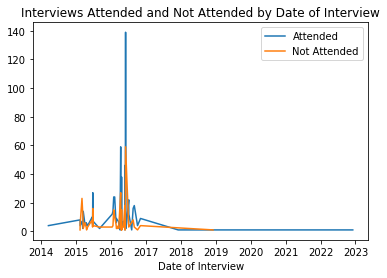

In [12]:
# lets compare the data from each row for the ppl who showed up at interviews vs those who
# didnt show

options = df['Observed Attendance'].unique()
print(options)

# based on actual values
fig = df[df['Observed Attendance']=='Yes'][
    ['Date of Interview','Observed Attendance']].sort_values(['Date of Interview'], 
    ascending=True).groupby('Date of Interview').count().plot()

df[df['Observed Attendance']=='No'][['Date of Interview',
    'Observed Attendance']].sort_values(['Date of Interview'],
    ascending=True).groupby('Date of Interview').count().plot(ax=fig)
plt.legend(['Attended','Not Attended'])
plt.title('Interviews Attended and Not Attended by Date of Interview')
plt.show()

Ttest_indResult(statistic=0.41428614484805415, pvalue=0.68234395123685121)

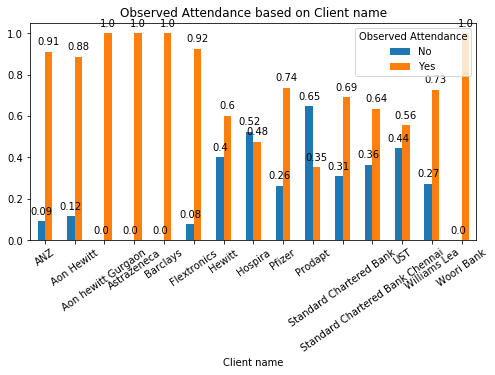

In [13]:
import scipy

colname = 'Client name'

# actual number
compare = df.groupby(colname)['Observed Attendance'].value_counts()

# average (normalized)
ax = df.groupby(colname)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                    figsize=(8,4))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
    va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=35)
plt.title('Observed Attendance based on ' + colname)


yes = df[df['Observed Attendance'] == 'Yes']
no = df[df['Observed Attendance'] == 'No']
scipy.stats.ttest_ind(yes.groupby(colname)['Observed Attendance'].value_counts(), 
                      no.groupby(colname)['Observed Attendance'].value_counts() )

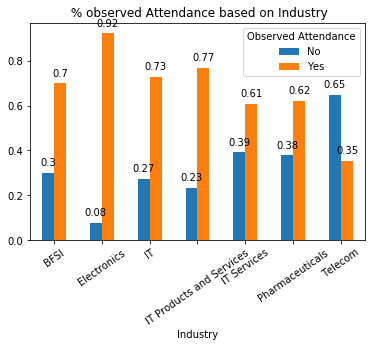

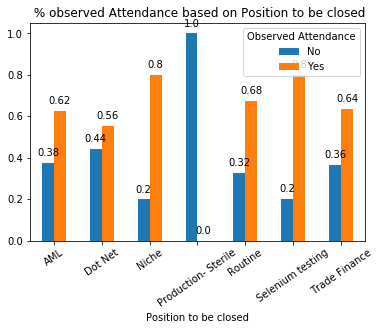

Ttest_indResult(statistic=0.66900834786576557, pvalue=0.51615471061332052)
Ttest_indResult(statistic=0.76284399233250422, pvalue=0.46160268235682633)


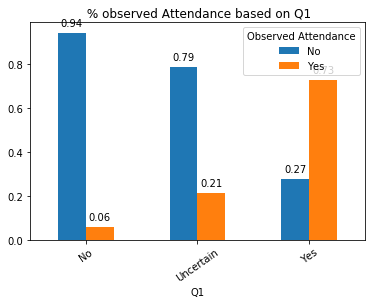

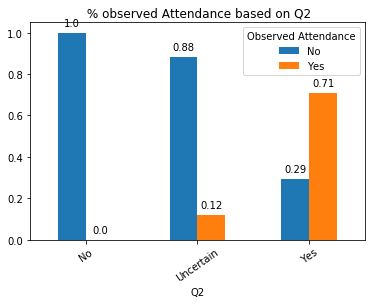

Ttest_indResult(statistic=0.52472520066540551, pvalue=0.62751097239821152)
Ttest_indResult(statistic=0.85654658075458301, pvalue=0.45466387012412857)


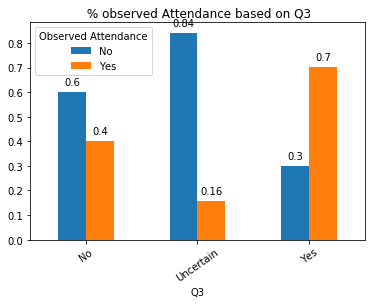

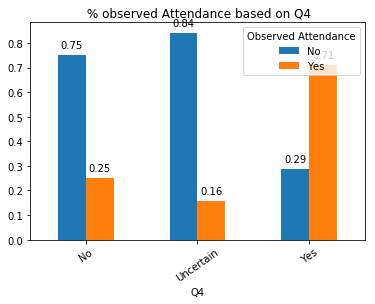

Ttest_indResult(statistic=0.51101697988575046, pvalue=0.63625236492250936)
Ttest_indResult(statistic=0.52006251694340966, pvalue=0.6304760857831837)


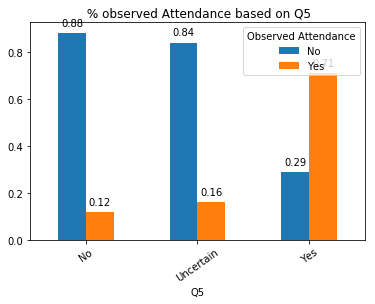

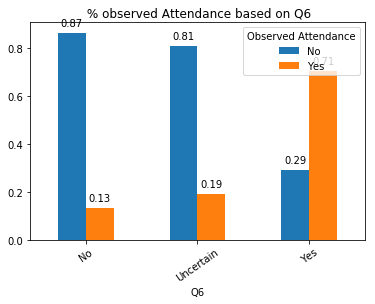

Ttest_indResult(statistic=0.5155887457918048, pvalue=0.6333289904989452)
Ttest_indResult(statistic=0.51325763844987238, pvalue=0.63481859077376668)


In [20]:
# now making that a function so i can apply it to multiple columns at once

def plot_col(colname, two):
    # actual number
    #df.groupby(colname)['Observed Attendance'].value_counts()

    # average (normalized)
    ax = df.groupby(colname)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                       # figsize=(8,4)
                                                        )
    for p in ax.patches: 
        ax.annotate(np.round(p.get_height(),decimals=2), 
        (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
        va='center', xytext=(0, 10), textcoords='offset points')
    plt.xticks(rotation=35)
    plt.title(' % observed Attendance based on ' + colname)
    
    # average (normalized)
    ax = df.groupby(two)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                       # figsize=(8,4)
                                                        )
    for p in ax.patches: 
        ax.annotate(np.round(p.get_height(),decimals=2), 
        (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
        va='center', xytext=(0, 10), textcoords='offset points')
    plt.xticks(rotation=35)
    plt.title(' % observed Attendance based on ' + two)
    
    plt.show()
    print(scipy.stats.ttest_ind(yes.groupby(colname)['Observed Attendance'].value_counts(), 
                      no.groupby(colname)['Observed Attendance'].value_counts() ))
    print(scipy.stats.ttest_ind(yes.groupby(two)['Observed Attendance'].value_counts(), 
                      no.groupby(two)['Observed Attendance'].value_counts() ))
    return

# cut out 'Interview Type' bc the values were unclear (all were the same??)
# removing "nature of skillset" temporarily bc it looks like the data needs to be cleaned
# removed 'Candidate Native location'
# removing 'Location', ,'Candidate Current Location', 'Candidate Job Location', 
# Interview Venue',  because i think they should all be looked at together (will do separately)
# removed 'Gender' and 'Marital Status' to look at separately

showup = ['Industry', 'Position to be closed', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']

length = len(showup)
i = 0

while i+2 < length:
    plot_col(showup[i], showup[i+1])
    i = i +2

In [14]:
testing = df.groupby(['Marital Status', 'Gender', 'Observed Attendance'])['Q7'].count()
testing

Marital Status  Gender  Observed Attendance
Married         Female  No                      37
                        Yes                     85
                Male    No                      74
                        Yes                    168
Single          Female  No                      34
                        Yes                     59
                Male    No                     163
                        Yes                    364
Name: Q7, dtype: int64

In [15]:
# 'Location', ,'Candidate Current Location', 'Candidate Job Location', 
# Interview Venue', i think should all be looked at together

moo = df.groupby(['Candidate Current Location', 'Interview Venue', 'Observed Attendance'])['Q7'].count()

moo

Candidate Current Location  Interview Venue  Observed Attendance
Bangalore                   Bangalore        No                      56
                                             Yes                    148
                            Chennai          No                       1
                                             Yes                      5
                            Hyderabad        No                       1
                                             Yes                      3
Chennai                     Chennai          No                     227
                                             Yes                    457
                            Hosur            No                       4
                            Hyderabad        Yes                      1
Cochin                      Cochin           No                       3
                                             Yes                      6
Delhi                       Gurgaon          Yes                      1

Ttest_indResult(statistic=0.63000591413736762, pvalue=0.53619450362633292)


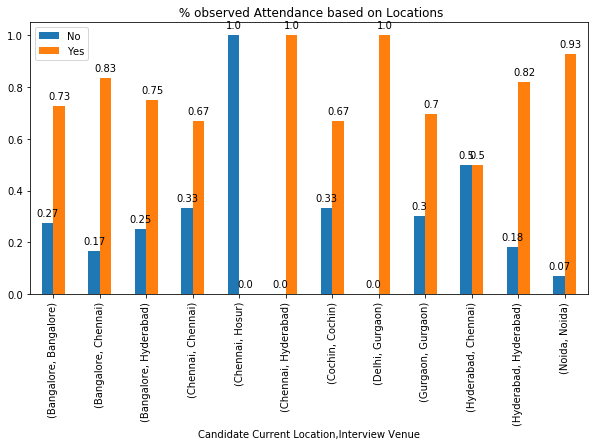

In [16]:
ax = df.groupby(['Candidate Current Location', 
    'Interview Venue'])['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))

for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
    va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=90)
plt.title(' % observed Attendance based on Locations' )
plt.legend()

print(scipy.stats.ttest_ind(yes.groupby(['Candidate Current Location', 
    'Interview Venue'])['Observed Attendance'].value_counts(), 
                      no.groupby(['Candidate Current Location', 
    'Interview Venue'])['Observed Attendance'].value_counts() ))

## Research proposal

Ensuring interview candidates come to interviews is important in saving the time of both the interviewee and the interviewers. Looking at the questions asked to each candidate, one question that stood out as statistically significant was the Question 2, "Hope there will be no unscheduled meetings". It looks like of the candidates who responded "No", none attended the interview, and the majority (88%) of candidates who gave any answer indicating uncertainty also didn't show. On the other side, 71% of candidates who responded 'Yes' did show up to the interview. 
One other variable that was statistically significant was the distance from the candidate's current location to the interview venue. If candidates didn't have to travel as far, they were more likely to attend the interview.

Considering these two factors, it should be possible to predict whether or not a candidate will show up at an interview, with an accuracy of 70% or greater.

In order to achieve this, the study will be run as it has been with a new randomized group of interview candidates: the interview candidates were asked the questionaire after being invited but prior to the interview. However, the expected attendance will be based off the two factors desribed above. First, the answer to question 2 will be considered. If the candidate says "No", then their expeccted attendance will change to 'No' and nothing further will need to be considered. If they answer that they are uncertain or 'Yes', then the distance of their location from the interview venue will be taken into consideration to determine their expected attendance.

After the questionaire is run, the expected attendances are estimated, and the interview either happeend or the candidate no-showed, the accuracy will be calculated. If the accuracy is over 70%, then these two methods can be considered effective in predicting whether or not a candidate will come to an interview. In that case, further measures can be implemented based on that information, in order to reduce candidate no shows.

If the accuracy is 70% or less, then the results will need to be evaluated and reconsidered to determine which factors are more important in predicitng the candidates attendance at interviews.